In [1]:
# Задача: построить модель, используя линейную регрессию

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])
# Датасет: 1-й столбец - население города *10000 чел, 2-й столбец - прибыль *10000$

df.info()    # Информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [3]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
# Посмотрим на описательную статистику по датасету:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


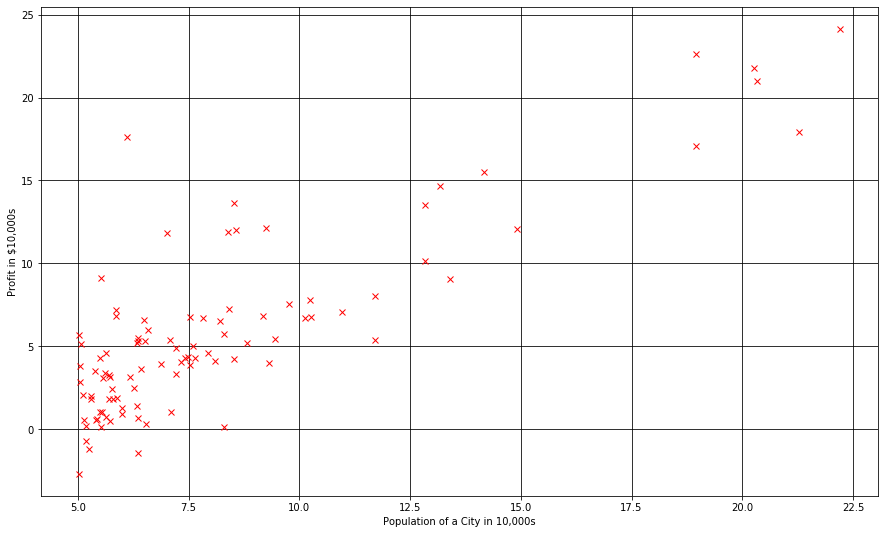

In [5]:
# Визуализируем данные
plt.figure(figsize=(15, 9))                       # Размер графика
plt.xlabel('Population of a City in 10,000s')       # Подпись по оси x
plt.ylabel('Profit in $10,000s')                  # Подпись по оси y
plt.grid(color='black')                           # Добавим сетку
plt.plot(df['Population'], df['Profit'], 'rx')

In [6]:
# DataFrame.insert(loc, column, value, allow_duplicates=False) - вставить столбец в датафрейм
df.insert(0, 'Ones', 1)    # Вставим столбец из 1, чтобы иметь возможность решать в матричном виде
df.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
X = df[['Ones', 'Population']]
y = df[['Profit']]

In [8]:
# Аналитически найдем оптимальные параметры уравнения линейной регрессии (способ 1)
X_matrix = np.matrix(X.values)
y_matrix = np.matrix(y.values)
print(X_matrix.shape)
print(y_matrix.shape)

theta_best = ((np.linalg.inv(((X_matrix.T).dot(X_matrix)))).dot(X_matrix.T)).dot(y_matrix)
print(float(theta_best[0][0]))
print(float(theta_best[1][0]))

(97, 2)
(97, 1)
-3.895780878311879
1.1930336441895957


Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

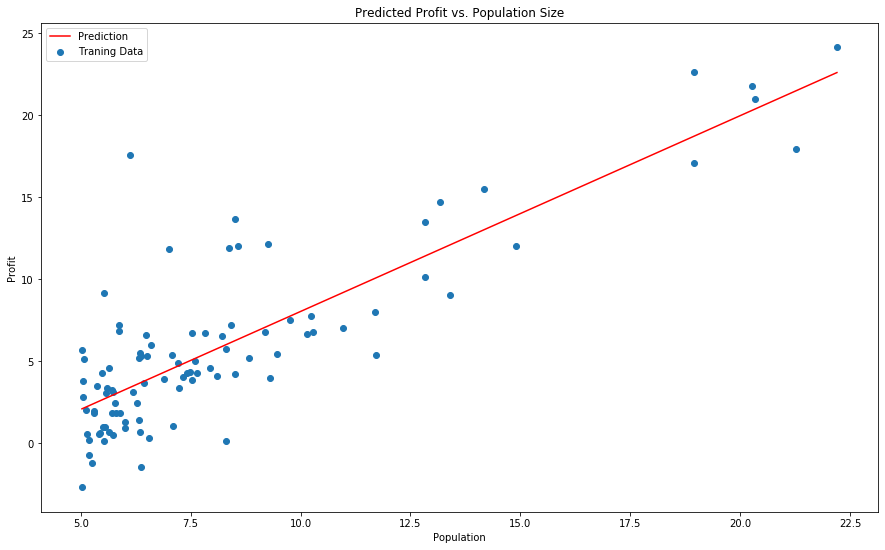

In [9]:
# Функция linspace() возвращает одномерный массив из указанного количества элементов, значения которых 
# равномерно распределенны внутри заданного интервала.
x = np.linspace(df['Population'].min(), df['Population'].max(), 100)
f = float(theta_best[0][0]) + (float(theta_best[1][0]) * x)

fig, ax = plt.subplots(figsize=(15,9))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df['Population'], df['Profit'], label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

In [10]:
# Реализуем градиентный спуск (способ 2)
theta = np.zeros((2,1))    # Зададим начальные значения для тета как 0
print(theta)

m = X.shape[0]    # количество тренировочных примеров
alpha = 0.01      # скорость обучения
iterations = 1500 # количество итераций

# Функция затрат (cost function)
def compute_cost(X_matrix, y_matrix, theta):
    mult = np.power(((X_matrix.dot(theta)) - y_matrix), 2)
    return np.sum(mult) / (2 * m)

compute_cost(X_matrix, y_matrix, theta)    # Значение функции затрат для начальных тета

[[0.]
 [0.]]


32.072733877455676

In [11]:
# функция Градиентного спуска
def gradientDescent(X, y, theta, alpha, iterations):
    temp = np.zeros(theta.shape) # начальные нулевые значения
    parameters = int(theta.shape[0])# количество строк у theta
    cost = np.zeros(iterations)
    m = X.shape[0]
 
    thetahistory = theta # Для построения графика сходимости Cost function записываем значения в архив
    
    for i in range(iterations):
        error = (X.dot(theta)) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])    # Умножение массива на число
            temp[j, 0] = theta[j, 0] - ((alpha / m) * np.sum(term))
            
        theta = temp    # Обновляем значения тета  
        
        cost[i] = compute_cost(X, y, theta) # сохраняет значение Cost function для каждого цикла
        thetahistory = np.append(thetahistory, temp, axis=0)
     
    
    # удалим из thetahistory перую строку с нулями, чтобы размер thetahistory=cost=iters
    thetahistory=thetahistory[1:][:]
    
    return theta, cost, thetahistory

gradientDescent(X_matrix, y_matrix, np.zeros((2,1)), 0.01, 1500)

(array([[-3.63029144],
        [ 1.16636235]]),
 array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
        4.48338826]),
 array([[ 0.        ],
        [ 0.05839135],
        [ 0.6532885 ],
        ...,
        [ 1.16631419],
        [-3.63029144],
        [ 1.16636235]]))

In [12]:
theta_final, cost_history, theta_history = gradientDescent(X_matrix, y_matrix, np.zeros((2,1)), 0.01, 1500)

print(theta_final)    # Значения вектора тета, найденные с помощью градиентного спуска
print(theta_best)     # Значения тета, найденные аналитически с помощью матричной формулы

print(len(cost_history))
print(len(theta_history))

[[-3.63029144]
 [ 1.16636235]]
[[-3.89578088]
 [ 1.19303364]]
1500
3001


Text(0.5, 1.0, 'Значение Cost function при соответсвующей итерации')

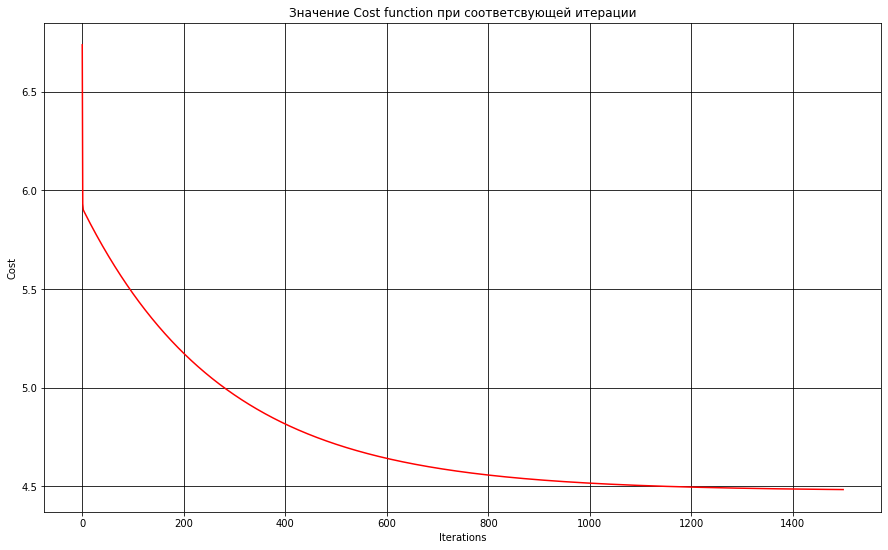

In [13]:
# Построим график зависимости Cost Function от количества итераций
fig, ax = plt.subplots(figsize=(15,9))
ax.plot(np.arange(iterations), cost_history, 'r')
ax.grid(color='black')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Значение Cost function при соответсвующей итерации')

In [14]:
# Воспользуемся библиотекой sklearn (способ 3)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score

reg = LinearRegression()
X, y = shuffle(X, y)    # перемешаем набор с исходными данными
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)    # разобъем данные на тренировочное и тестовое мн-ва

reg.fit(X_train, y_train)    # обучим модель
print(reg.score(X_train, y_train))    # результаты на тренировочном множестве
print(reg.score(X_test, y_test))    # результаты на тестовом множестве

y_pred = reg.predict(X_test)

0.770588919545916
0.5737221841222251


Text(0.5, 1.0, 'Profit vs. Population Size')

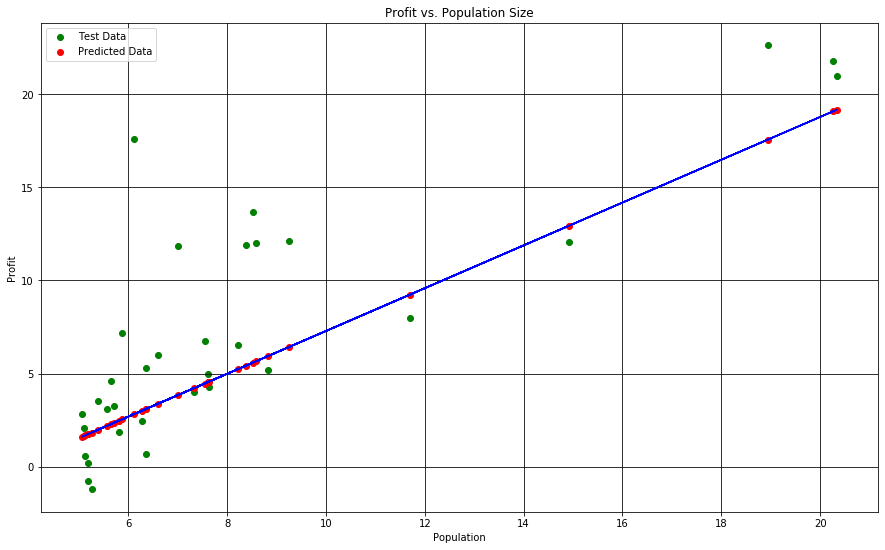

In [15]:
fig, ax = plt.subplots(figsize=(15,9))
ax.scatter(X_test['Population'], y_test, color='green', label='Test Data')
ax.scatter(X_test['Population'], y_pred, color='red', label='Predicted Data')
ax.plot(X_test['Population'], y_pred, color='blue')
ax.grid(color='black')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Profit vs. Population Size')

In [16]:
# Задача 2. Линейная регрессия с несколькими переменными

df_2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
# Датасет: 1-й столбец - размер дома (square feet), 2-й столбец - количество спален, 3-й столбец - цена дома

df_2.info()    # Информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
Size        47 non-null int64
Bedrooms    47 non-null int64
Price       47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [17]:
df_2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [18]:
df_2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [19]:
# DataFrame.insert(loc, column, value, allow_duplicates=False) - вставить столбец в датафрейм
df_2.insert(0, 'Ones', 1)    # Вставим столбец из 1, чтобы иметь возможность решать в матричном виде
df_2.head()

,Ones,Size,Bedrooms,Price
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900


In [20]:
X = df_2[['Ones', 'Size', 'Bedrooms']]
y = df_2[['Price']]

In [21]:
# Аналитически найдем оптимальные параметры уравнения линейной регрессии
# При решении данным методом нет необходимости осуществлять нормализацию данных
X_matrix = np.matrix(X.values)
y_matrix = np.matrix(y.values)
print(X_matrix.shape)
print(y_matrix.shape)

theta_best = ((np.linalg.inv(((X_matrix.T).dot(X_matrix)))).dot(X_matrix.T)).dot(y_matrix)
print(float(theta_best[0][0]))
print(float(theta_best[1][0]))
print(float(theta_best[2][0]))

(47, 3)
(47, 1)
89597.90954279543
139.21067401762562
-8738.01911232782


In [22]:
theta0 = float(theta_best[0][0])
theta1 = float(theta_best[1][0])
theta2 = float(theta_best[2][0])

x1 = 1650    # square feet
x2 = 3       # bedrooms

Price_pred = theta0 + theta1 * x1 + theta2 * x2
print('Стоимость дома с 3-мя спальнями и площадью 1650 кв. футов =', round(Price_pred, 2), 'долларов.')

Стоимость дома с 3-мя спальнями и площадью 1650 кв. футов = 293081.46 долларов.
